# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science / ML case study interviews).**

Due Date : 10/14 (October 14th), 11:59 PM EST

## Name: Please input your name

## UNI: Please input your UNI

## The Dataset

### Acknowledgements

Big Thanks to https://www.superdatascience.com/pages/deep-learning

Banner Photo by Sharon McCutcheon on Unsplash

### Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Question 1: Decision Trees

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


**1.1: Load the provided dataset**

In [ ]:
df = pd.read_csv("HW2_dataset.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

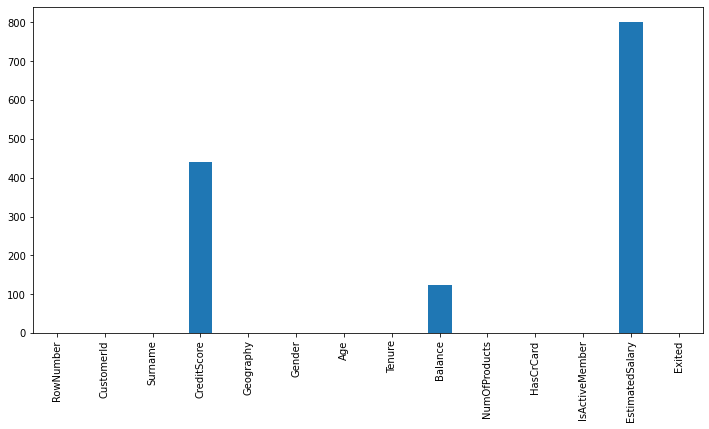

In [ ]:
plt.figure(figsize = (12, 6))
df.isna().sum().plot.bar();

We will be dropping `RowNumber`, `CustomerId` and `Surname` since it is not useful for the primary classification task.

In [ ]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

Also we will be imputing the missing values with the mean values

In [ ]:
cols = ["CreditScore", "Balance", "EstimatedSalary"]
for i in cols:
  df[i] = df[i].fillna(df[i].mean())

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

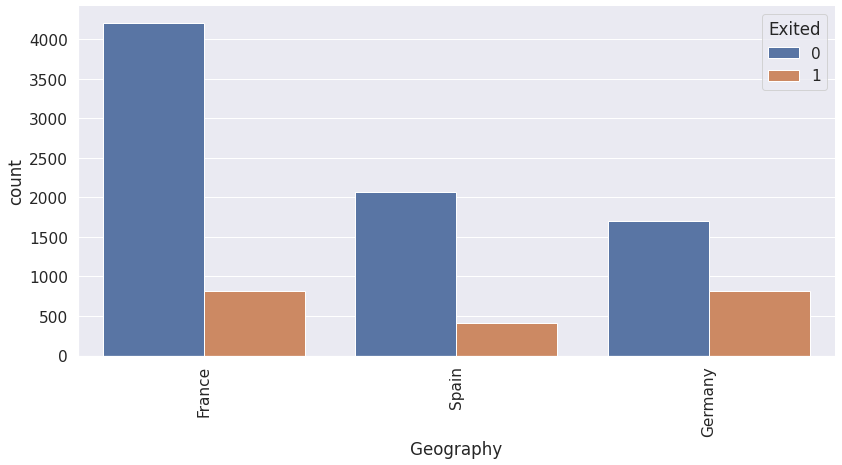

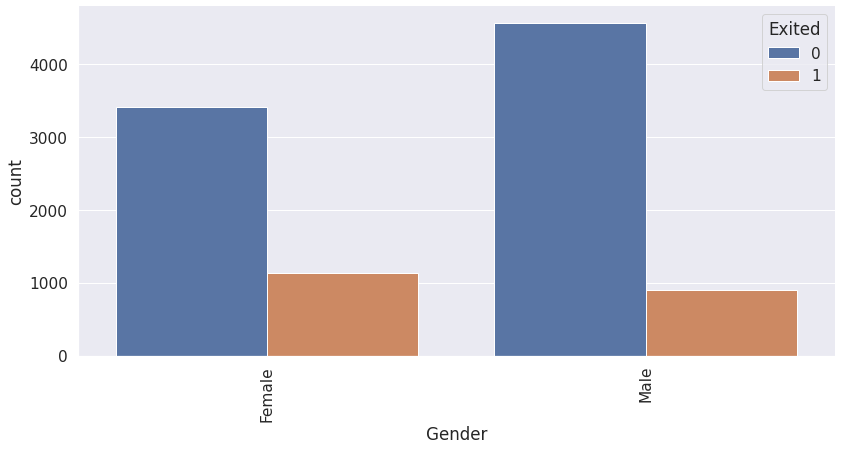

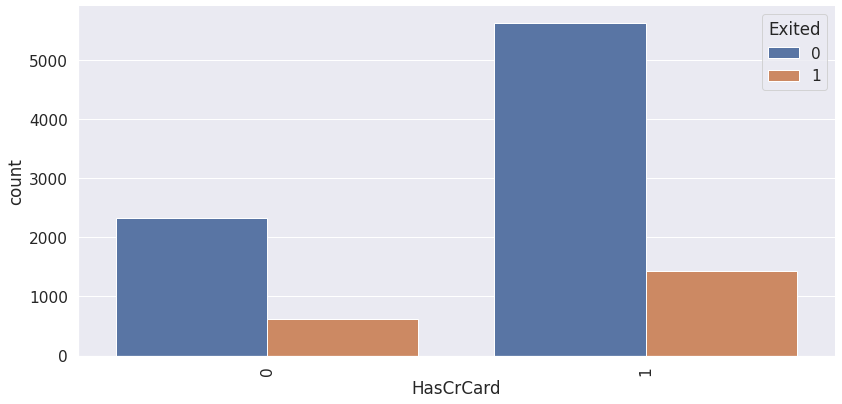

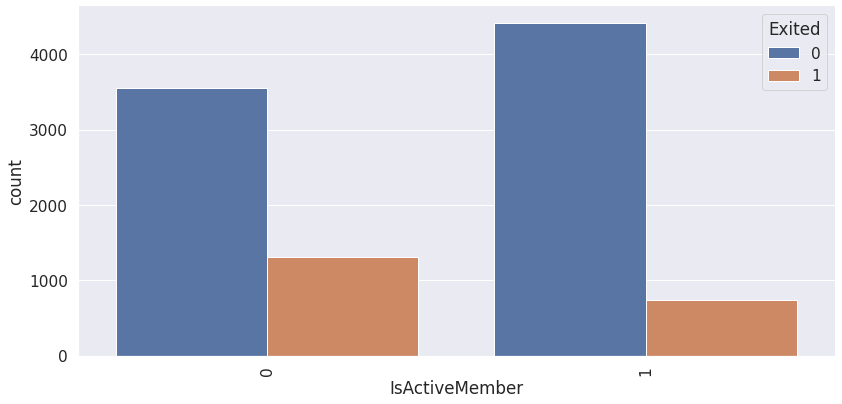

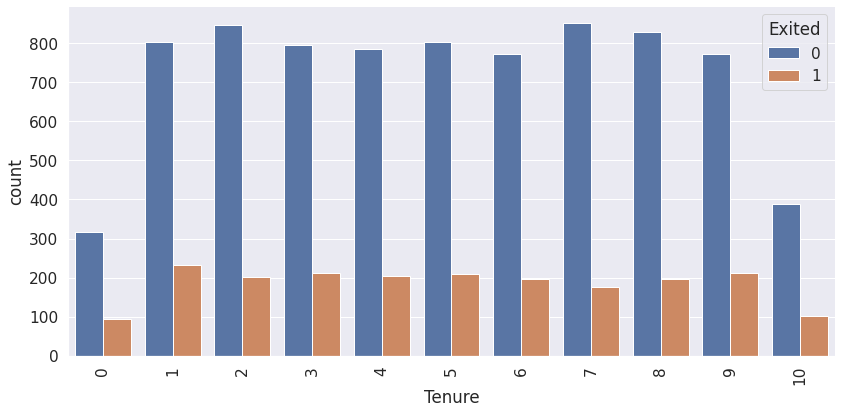

In [ ]:
c = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "Tenure"]
sns.set(font_scale = 1.4)
for i, col_name in enumerate(c):
    sns.catplot(x = col_name, hue = 'Exited', kind = 'count', data = df, height = 6, aspect = 2, legend_out = False)
    plt.xticks(rotation = 90)
plt.show()

**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Exited"])
y = df['Exited']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_enc = OneHotEncoder(handle_unknown='ignore')

## Handling Gender in Dev Set
X_dev['Gender'] = np.where(X_dev['Gender'] == 'Male', 1, 0)

## Handling Geography in Dev Set
one_hot_map_dev = one_enc.fit_transform(X_dev[["Geography"]])
one_hot_map_dev_df = pd.DataFrame(one_hot_map_dev.toarray(), columns = one_enc.get_feature_names_out())
X_dev_preprocessed = X_dev.join(one_hot_map_dev_df)
X_dev_preprocessed.drop(["Geography"], axis = 1, inplace = True)
X_dev_preprocessed.fillna(0, inplace = True)

## Handling Gender in Test Set
X_test['Gender'] = np.where(X_test['Gender'] == 'Male', 1, 0)

## Handling Geography in Test Set
one_hot_map_test = one_enc.transform(X_test[['Geography']])
one_hot_map_test_df = pd.DataFrame(one_hot_map_test.toarray(), columns = one_enc.get_feature_names_out())
X_test_preprocessed = X_test.join(one_hot_map_test_df)
X_test_preprocessed.drop(['Geography'], axis = 1, inplace = True)
X_test_preprocessed.fillna(0, inplace = True)

No scaling is necessary as we are using trees which are invariant to scale of the input data.

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

***** Development Set Analysis *****
Accuracy on Dev Set  : 1.0000
Precision :  1.0
Recall :  1.0
F1 Score :  1.0


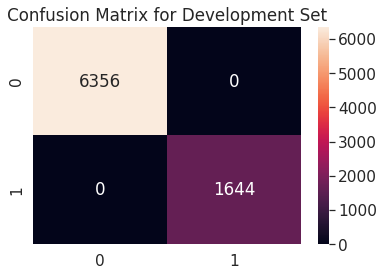

***** Test Set Analysis *****
Accuracy on Test Set : 0.7610
Precision :  0.631045038326571
Recall :  0.6407891049178926
F1 Score :  0.6353544461583295


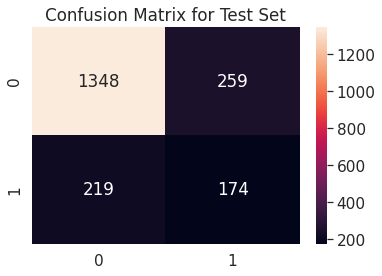

In [ ]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

clf = tree.DecisionTreeClassifier()
clf.fit(X_dev_preprocessed, y_dev)

y_pred_dev = clf.predict(X_dev_preprocessed)
y_pred_test = clf.predict(X_test_preprocessed)

dev_acc = sum(np.where(y_pred_dev == y_dev, 1, 0))/y_dev.shape[0]
test_acc = sum(np.where(y_pred_test == y_test, 1, 0))/y_test.shape[0]

print("***** Development Set Analysis *****")
print("Accuracy on Dev Set  : {:0.4f}".format(dev_acc))
prfs = precision_recall_fscore_support(y_dev, y_pred_dev, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])
cf = confusion_matrix(y_dev, y_pred_dev)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Development Set")
plt.show()

print("***** Test Set Analysis *****")
print("Accuracy on Test Set : {:0.4f}".format(test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_test, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])
cf = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Test Set")
plt.show()

**1.7: Visualize the trained tree until the max_depth 8**

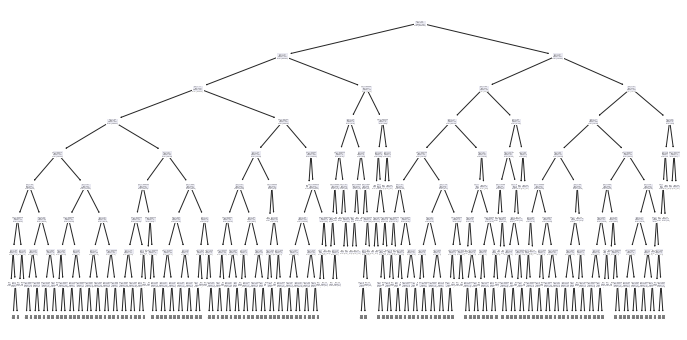

In [ ]:
plt.figure(figsize = (12, 6))
tree.plot_tree(clf, max_depth = 8);

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [ ]:
path = clf.cost_complexity_pruning_path(X_dev_preprocessed, y_dev)
alphas = path['ccp_alphas']

len(alphas)

468

In [ ]:
path = clf.cost_complexity_pruning_path(X_dev_preprocessed, y_dev)
alphas = path['ccp_alphas']

# alphas = alphas[250:450]

best_clf = None
best_acc_score = 0.0
best_alpha = None
for i in alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha = i, random_state = 42)
    clf.fit(X_dev_preprocessed, y_dev)
    
    y_pred = clf.predict(X_test_preprocessed)
    test_acc = sum(np.where(y_pred == y_test, 1, 0))/y_test.shape[0]
    
    if test_acc > best_acc_score:
        best_acc_score = test_acc
        best_clf = clf
        best_alpha = i

print("Best Test Set Accuracy at alpha {} : {:0.4f}".format(best_alpha, best_acc_score))
print("At this alpha, the max depth is    : {}".format(best_clf.tree_.max_depth))

Best Test Set Accuracy at alpha 0.0006973052805726854 : 0.8570
At this alpha, the max depth is    : 6


In [ ]:
best_clf_y_pred = best_clf.predict(X_test_preprocessed)
prfs = precision_recall_fscore_support(y_test, best_clf_y_pred, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Precision :  0.8103937934640111
Recall :  0.6870719862687258
F1 Score :  0.7218932264469818


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

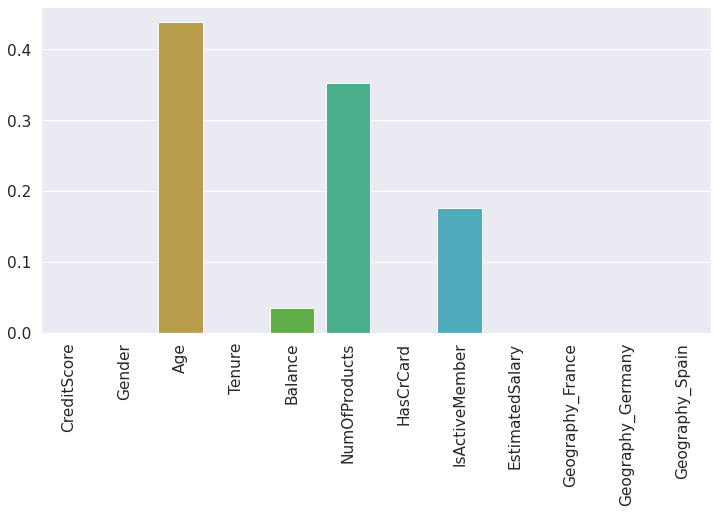

In [ ]:
features = X_dev_preprocessed.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = best_clf.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

rfc = RandomForestClassifier()
rfc.fit(X_dev_preprocessed, y_dev)

y_pred_test_rfc = clf.predict(X_test_preprocessed)
test_acc_rfc = sum(np.where(y_pred_test_rfc == y_test, 1, 0))/y_test.shape[0]

print("Accuracy on Test Set : {:0.4f}".format(test_acc_rfc))
prfs = precision_recall_fscore_support(y_test, y_pred_test_rfc, average = 'macro', zero_division = 0)
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Accuracy on Test Set : 0.8035
Precision :  0.40175
Recall :  0.5
F1 Score :  0.44552259495425556


Random Forest performs better on Decision Tree

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [ ]:
def bfs(clf):
    '''Implementing Breadth First Search to find the Impurities in the Leaf Nodes'''
    q = [0]
    l_c = clf.tree_.children_left
    r_c = clf.tree_.children_right
    imp = clf.tree_.impurity
    imp_leaf = []
    while q:
        temp = q.pop(0)
        # If left child and right child are same it means that it is a leaf node.
        if l_c[temp] == r_c[temp]:
            impurity = imp[temp]
            imp_leaf.append(impurity)
        else:
            q.append(l_c[temp])
            q.append(r_c[temp])
    return imp_leaf

trees = rfc.estimators_
for dec_tree in trees:
    leaf_node_impurity = bfs(dec_tree)
    assert all(leaf_node_impurity) == 0.0

Yes, all tree in random forest have pure leaves

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


'n_estimators' and 'ccp_alpha'

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

They can choose randomly or values between min and max range of current values

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [ ]:
from sklearn.model_selection import GridSearchCV

nos_est = [50, 100, 200]
alpha = np.logspace(-6, -4, 3)

params = {'n_estimators' : nos_est,
         'ccp_alpha' : alpha}

rfc_tuned = GridSearchCV(RandomForestClassifier(), params, cv = 3, verbose = 5, scoring = 'accuracy')
rfc_tuned.fit(X_dev_preprocessed, y_dev)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ..ccp_alpha=1e-06, n_estimators=50;, score=0.853 total time=   0.3s
[CV 2/3] END ..ccp_alpha=1e-06, n_estimators=50;, score=0.852 total time=   0.3s
[CV 3/3] END ..ccp_alpha=1e-06, n_estimators=50;, score=0.848 total time=   0.3s
[CV 1/3] END .ccp_alpha=1e-06, n_estimators=100;, score=0.856 total time=   0.7s
[CV 2/3] END .ccp_alpha=1e-06, n_estimators=100;, score=0.852 total time=   0.7s
[CV 3/3] END .ccp_alpha=1e-06, n_estimators=100;, score=0.850 total time=   0.6s
[CV 1/3] END .ccp_alpha=1e-06, n_estimators=200;, score=0.857 total time=   1.3s
[CV 2/3] END .ccp_alpha=1e-06, n_estimators=200;, score=0.853 total time=   1.3s
[CV 3/3] END .ccp_alpha=1e-06, n_estimators=200;, score=0.850 total time=   1.3s
[CV 1/3] END ..ccp_alpha=1e-05, n_estimators=50;, score=0.851 total time=   0.3s
[CV 2/3] END ..ccp_alpha=1e-05, n_estimators=50;, score=0.852 total time=   0.3s
[CV 3/3] END ..ccp_alpha=1e-05, n_estimators=50;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([1.e-06, 1.e-05, 1.e-04]),
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=5)

In [ ]:
print("Best Hyperparameters : ", rfc_tuned.best_params_)

print("--------------------------------------------------------------------------")

y_pred_rfc_tuned = rfc_tuned.predict(X_test_preprocessed)
rfc_tuned_test_acc = sum(np.where(y_pred_rfc_tuned == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(rfc_tuned_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_rfc_tuned, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Hyperparameters :  {'ccp_alpha': 1e-06, 'n_estimators': 200}
--------------------------------------------------------------------------
Best Test Set Accuracy on tuned model : 0.8510
Precision :  0.795482662611695
Recall :  0.6766104400119706
F1 Score :  0.709436111046108


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

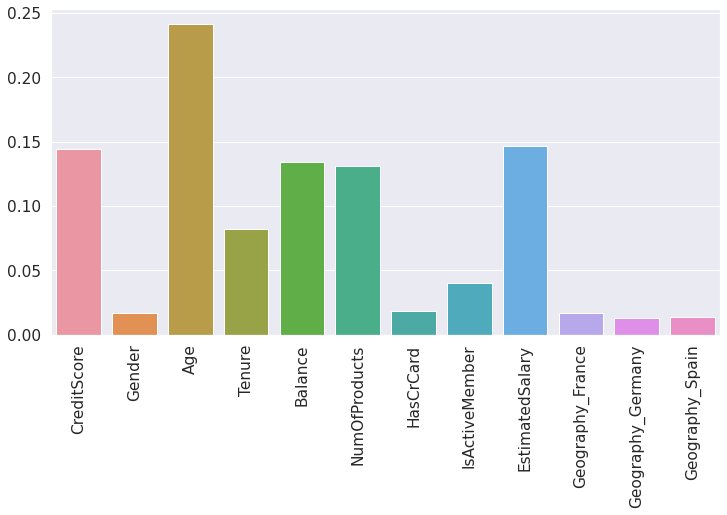

In [ ]:
features = X_dev_preprocessed.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = rfc_tuned.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

print("-----Gradient Boosting Classifier-----")

parameters = {"n_estimators": [50, 100],
            "max_depth": [5, 10],
            "learning_rate": [0.1, 1]}

GBC = GridSearchCV(GradientBoostingClassifier(), parameters, scoring = 'accuracy', verbose = 5, cv = 5)
GBC.fit(X_dev_preprocessed, y_dev)

-----Gradient Boosting Classifier-----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.861 total time=   0.7s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.849 total time=   0.7s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.856 total time=   0.7s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.859 total time=   0.7s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.851 total time=   0.7s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.860 total time=   1.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.846 total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.853 total time=   1.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.854 total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_esti

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=5)

In [ ]:
print("Time for model selection : {} seconds".format(time.time() - start_time))
print("Best Hyperparameters : ", GBC.best_params_)

Time for model selection : 69.0322015285492 seconds
Best Hyperparameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [ ]:
y_pred_GBC = GBC.predict(X_test_preprocessed)
GBC_test_acc = sum(np.where(y_pred_GBC == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(GBC_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_GBC, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8600
Precision :  0.8106859914340454
Recall :  0.6995112033707491
F1 Score :  0.7334749723480284


In [ ]:
start_time = time.time()

print("-----Hist Gradient Boosting Classifier-----")

parameters = {"max_depth": [5, 10],
            "learning_rate": [0.1, 1],
             'l2_regularization': np.logspace(-1, 2, 2)}

HGBC = GridSearchCV(HistGradientBoostingClassifier(), parameters, scoring = 'accuracy', verbose = 5, cv = 5)
HGBC.fit(X_dev_preprocessed, y_dev)

-----Hist Gradient Boosting Classifier-----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.863 total time=   0.2s
[CV 2/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.848 total time=   0.2s
[CV 3/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.860 total time=   0.2s
[CV 4/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.857 total time=   0.3s
[CV 5/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=5;, score=0.850 total time=   0.2s
[CV 1/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.856 total time=   0.4s
[CV 2/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.844 total time=   0.4s
[CV 3/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.852 total time=   0.4s
[CV 4/5] END l2_regularization=0.1, learning_rate=0.1, max_depth=10;, score=0.849 total time=

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(),
             param_grid={'l2_regularization': array([  0.1, 100. ]),
                         'learning_rate': [0.1, 1], 'max_depth': [5, 10]},
             scoring='accuracy', verbose=5)

In [ ]:
print("Time for model selection : {} seconds".format(time.time() - start_time))
print("Best Hyperparameters : ", HGBC.best_params_)

Time for model selection : 12.898680925369263 seconds
Best Hyperparameters :  {'l2_regularization': 100.0, 'learning_rate': 0.1, 'max_depth': 10}


In [ ]:
y_pred_HGBC = HGBC.predict(X_test_preprocessed)
HGBC_test_acc = sum(np.where(y_pred_HGBC == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(HGBC_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_HGBC, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8585
Precision :  0.8019185024304478
Recall :  0.7033834163828416
F1 Score :  0.7351148342712732


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [ ]:
from xgboost import XGBClassifier

start_time = time.time()

print("-----XGBoost Classifier-----")

parameters = {'max_depth': [5, 10],
             'eta': np.logspace(-2, 1, 2),
             'lambda': np.logspace(-3, 1, 2)}

XGB = GridSearchCV(XGBClassifier(eval_metric = 'logloss'), parameters, scoring = 'accuracy', verbose = 5, cv = 10)
XGB.fit(X_dev_preprocessed, y_dev)

-----XGBoost Classifier-----
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.866 total time=   0.5s
[CV 2/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.859 total time=   0.5s
[CV 3/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.849 total time=   0.5s
[CV 4/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.851 total time=   0.5s
[CV 5/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.870 total time=   0.5s
[CV 6/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.848 total time=   0.5s
[CV 7/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.869 total time=   0.5s
[CV 8/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.844 total time=   0.5s
[CV 9/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.854 total time=   0.5s
[CV 10/10] END eta=0.01, lambda=0.001, max_depth=5;, score=0.853 total time=   0.5s
[CV 1/10] END eta=0.01, lambda=0.001, max_depth=10;, score=0.858 total time=   

GridSearchCV(cv=10, estimator=XGBClassifier(eval_metric='logloss'),
             param_grid={'eta': array([ 0.01, 10.  ]),
                         'lambda': array([1.e-03, 1.e+01]),
                         'max_depth': [5, 10]},
             scoring='accuracy', verbose=5)

In [ ]:
print("Time for model selection : {} seconds".format(time.time() - start_time))
print("Best Hyperparameters : ", XGB.best_params_)

Time for model selection : 63.52118444442749 seconds
Best Hyperparameters :  {'eta': 0.01, 'lambda': 0.001, 'max_depth': 5}


In [ ]:
y_pred_XGB = XGB.predict(X_test_preprocessed)
XGB_test_acc = sum(np.where(y_pred_XGB == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(XGB_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_XGB, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8610
Precision :  0.8105840515942377
Recall :  0.7039779843591412
F1 Score :  0.7374405935731501


**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

Comparision can be done using test accuracy or other metrics such as precision, recall or even AUC-ROC curve or AP curves

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

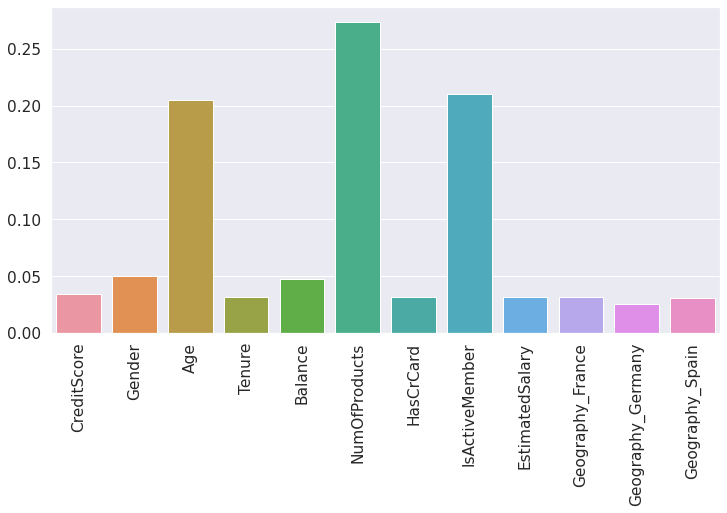

In [ ]:
features = X_dev_preprocessed.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = XGB.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [ ]:
from collections import defaultdict

feature_imp = XGB.best_estimator_.feature_importances_

d = defaultdict(int)

for i, val in enumerate(feature_imp):
    d[i] = val
    
d = sorted(d.items(), key = lambda x: x[1], reverse = True)

top_7_features = [features[i[0]] for i in d][:7]
print("Top 7 features are : ", top_7_features)

Top 7 features are :  ['NumOfProducts', 'IsActiveMember', 'Age', 'Gender', 'Balance', 'CreditScore', 'HasCrCard']


In [ ]:
start_time = time.time()

print("-----XGBoost Classifier for Top 7 features-----")

parameters = {'max_depth': [5, 10],
             'eta': np.logspace(-3, -1, 2),
             'lambda': np.logspace(-2, 2, 2)}

XGB_tuned = GridSearchCV(XGBClassifier(eval_metric = "logloss"), parameters, scoring = 'accuracy', verbose = 5, cv = 5)
XGB_tuned.fit(X_dev_preprocessed[top_7_features], y_dev)

-----XGBoost Classifier for Top 7 features-----
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.861 total time=   0.3s
[CV 2/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.851 total time=   0.3s
[CV 3/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.859 total time=   0.3s
[CV 4/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.855 total time=   0.3s
[CV 5/5] END eta=0.001, lambda=0.01, max_depth=5;, score=0.849 total time=   0.3s
[CV 1/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.849 total time=   0.7s
[CV 2/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.844 total time=   0.7s
[CV 3/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.859 total time=   0.7s
[CV 4/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.841 total time=   0.7s
[CV 5/5] END eta=0.001, lambda=0.01, max_depth=10;, score=0.844 total time=   0.7s
[CV 1/5] END eta=0.001, lambda=100.0, max_depth=5;, score=0.861 tot

GridSearchCV(cv=5, estimator=XGBClassifier(eval_metric='logloss'),
             param_grid={'eta': array([0.001, 0.1  ]),
                         'lambda': array([1.e-02, 1.e+02]),
                         'max_depth': [5, 10]},
             scoring='accuracy', verbose=5)

In [ ]:
print("Time for model selection : {}".format(time.time() - start_time))
print("Best Hyperparameters : ", XGB_tuned.best_params_)

Time for model selection : 20.47127342224121
Best Hyperparameters :  {'eta': 0.001, 'lambda': 0.01, 'max_depth': 5}


In [ ]:
y_pred_XGB_tuned = XGB_tuned.predict(X_test_preprocessed[top_7_features])
XGB_tuned_test_acc = sum(np.where(y_pred_XGB_tuned == y_test, 1, 0))/y_test.shape[0]

print("Best Test Set Accuracy on tuned model : {:0.4f}".format(XGB_tuned_test_acc))
prfs = precision_recall_fscore_support(y_test, y_pred_XGB_tuned, average = 'macro')
print("Precision : ", prfs[0])
print("Recall : ", prfs[1])
print("F1 Score : ", prfs[2])

Best Test Set Accuracy on tuned model : 0.8615
Precision :  0.8166827541827542
Recall :  0.6994834938112677
F1 Score :  0.7345867482133712


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [ ]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

print(brier_score_loss(y_test, XGB.predict_proba(X_test_preprocessed)[:, 1]))

0.10557743574984856


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

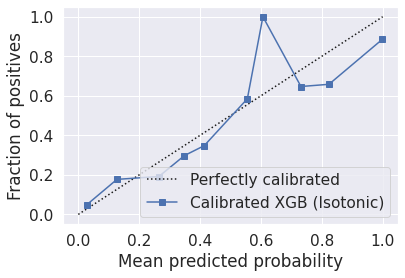

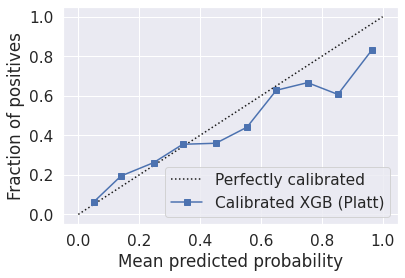

In [ ]:
# Splitting data to get the calibration set
X_train, X_calib, y_train, y_calib = train_test_split(X_dev_preprocessed, y_dev, test_size = 0.25, random_state = 0)

# Isotonic Regression
cal_XGB_isotonic = CalibratedClassifierCV(XGB, cv = "prefit", method = "isotonic")
cal_XGB_isotonic.fit(X_calib, y_calib)
display_isotonic = CalibrationDisplay.from_estimator(cal_XGB_isotonic, X_test_preprocessed, y_test, n_bins = 10, name = 'Calibrated XGB (Isotonic)')

# Platt Scaling
cal_XGB_platt = CalibratedClassifierCV(XGB, cv = "prefit", method = "sigmoid")
cal_XGB_platt.fit(X_calib, y_calib)
display_platt = CalibrationDisplay.from_estimator(cal_XGB_platt, X_test_preprocessed, y_test, n_bins = 10, name = 'Calibrated XGB (Platt)')

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [ ]:
print("Brier Score for Isotonic Regression : {:0.4f}".format(brier_score_loss(y_test, cal_XGB_isotonic.predict_proba(X_test_preprocessed)[:, 1])))
print("Brier Score for Platt Scaling       : {:0.4f}".format(brier_score_loss(y_test, cal_XGB_platt.predict_proba(X_test_preprocessed)[:, 1])))

Brier Score for Isotonic Regression : 0.1081
Brier Score for Platt Scaling       : 0.1090
